In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import sklearn.metrics as sklm

In [2]:
import prepare
import acquire


# Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:



1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [3]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
# df.head()
train, validate, test = prepare.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [4]:
train.survived.value_counts() # Baseline = everyone dies.


0    302
1    196
Name: survived, dtype: int64

In [5]:
train.survived.mode()[0]

0

In [6]:
train['model_baseline'] = train.survived.mode()[0]
train.model_baseline.head()

689    0
84     0
738    0
441    0
643    0
Name: model_baseline, dtype: int64

In [7]:
pd.DataFrame(classification_report(train.survived, train.model_baseline, output_dict=True))

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0,1,accuracy,macro avg,weighted avg
precision,0.606426,0.0,0.606426,0.303213,0.367752
recall,1.000000,0.0,0.606426,0.500000,0.606426
f1-score,0.755000,0.0,0.606426,0.377500,0.457851
support,302.000000,196.0,0.606426,498.000000,498.000000


In [8]:
1- train.survived.mean() #We can just predict accuracy this way

0.606425702811245

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [9]:
def split_x_y(df, target, features):
    x = df[features]
    y = df[target]
    return x, y

In [10]:
y_train = train.survived
x_train = train[['pclass','sex_male','fare','alone','embark_town_Queenstown','embark_town_Southampton']]
x_train.head()

,pclass,sex_male,fare,alone,embark_town_Queenstown,embark_town_Southampton
689,1,0,211.3375,0,0,1
84,2,0,10.5000,1,0,1
738,3,1,7.8958,1,0,1
441,3,1,9.5000,1,0,1
643,3,1,56.4958,1,0,1


In [11]:
tree = DecisionTreeClassifier(max_depth = 3)

In [12]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
tree.classes_

array([0, 1], dtype=int64)

In [14]:
print(
    export_text(decision_tree=tree, feature_names=x_train.columns.tolist())
)

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 26.12
|   |   |   |--- class: 1
|   |   |--- fare >  26.12
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 1
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- pclass <= 1.50
|   |   |--- fare <= 26.11
|   |   |   |--- class: 0
|   |   |--- fare >  26.11
|   |   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- fare <= 7.91
|   |   |   |--- class: 0
|   |   |--- fare >  7.91
|   |   |   |--- class: 0



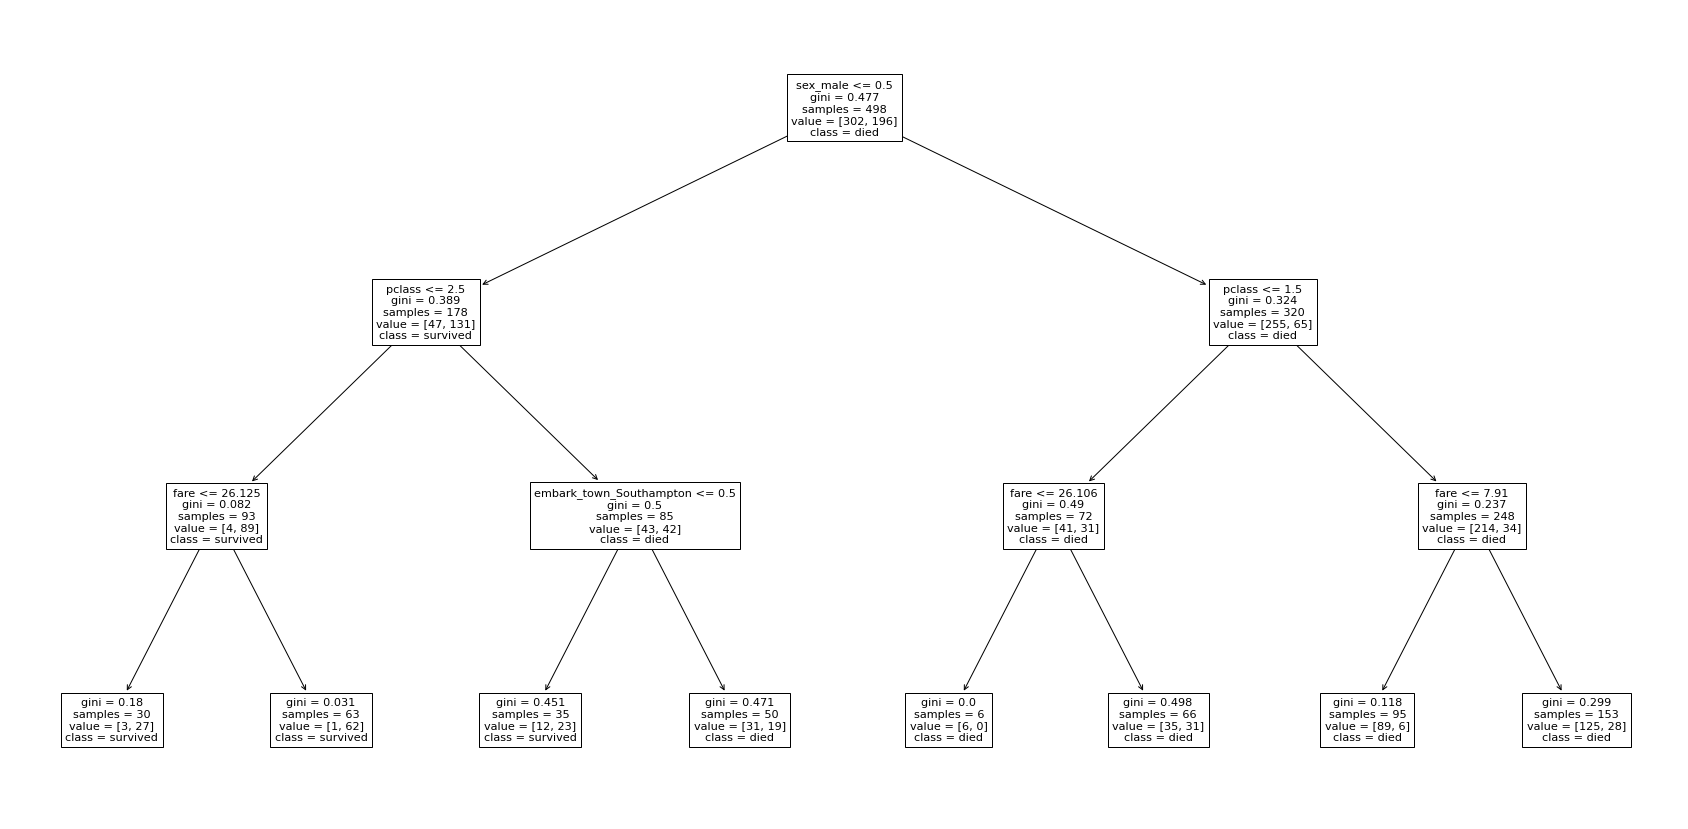

In [15]:
plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=x_train.columns, class_names=['died','survived'])
plt.show()

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [16]:
predictions = tree.predict(x_train)
actual = y_train
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       302
           1       0.88      0.57      0.69       196

    accuracy                           0.80       498
   macro avg       0.82      0.76      0.77       498
weighted avg       0.81      0.80      0.79       498



In [17]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,286,16
1,84,112


In [18]:
def get_tn_fp_fn_tp_from_confusion_matrix(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tn, fp, fn, tp

In [19]:
tn, fp, fn, tp = confusion_matrix(y_true=actual,y_pred=predictions).ravel()
tn, fp, fn, tp


(286, 16, 84, 112)

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [20]:
score = {
        'accuracy' : sklm.accuracy_score(actual, predictions) ,
        'true_positive_rate' : tp/(tp+fp) ,
        'false_positive_rate' : fp/(tp+fp) ,
        'true_negative_rate' : tn/(tn+fn) ,
        'false_negative_rate' : fn/(tn+fn) ,
        'precision' : sklm.precision_score(actual, predictions),
        'recall'    : sklm.recall_score(actual, predictions),
        'f1-score'  : sklm.f1_score(actual, predictions),
        'support_negative' : actual.value_counts()[0],
        'support_positive' : actual.value_counts()[1]
        }
score

{'accuracy': 0.7991967871485943,
 'true_positive_rate': 0.875,
 'false_positive_rate': 0.125,
 'true_negative_rate': 0.772972972972973,
 'false_negative_rate': 0.22702702702702704,
 'precision': 0.875,
 'recall': 0.5714285714285714,
 'f1-score': 0.691358024691358,
 'support_negative': 302,
 'support_positive': 196}

In [21]:
classification_report(actual, predictions, output_dict=True)

{'0': {'precision': 0.772972972972973,
  'recall': 0.9470198675496688,
  'f1-score': 0.8511904761904762,
  'support': 302},
 '1': {'precision': 0.875,
  'recall': 0.5714285714285714,
  'f1-score': 0.691358024691358,
  'support': 196},
 'accuracy': 0.7991967871485943,
 'macro avg': {'precision': 0.8239864864864865,
  'recall': 0.7592242194891201,
  'f1-score': 0.7712742504409171,
  'support': 498},
 'weighted avg': {'precision': 0.8131281884293933,
  'recall': 0.7991967871485943,
  'f1-score': 0.788284531423755,
  'support': 498}}

5. Run through steps 2-4 using a different max_depth value.



In [22]:
def test_tree(x, y, depth, score_x=None, score_y=None):
    tree = DecisionTreeClassifier(max_depth = depth)
    tree.fit(x, y)
    predictions = tree.predict(score_x) if isinstance(score_x, pd.DataFrame) else tree.predict(x)
    actual = score_y if isinstance(score_y, pd.Series) else y
    tn, fp, fn, tp = confusion_matrix(y_true=actual,y_pred=predictions).ravel()
    score = {
        depth : {
            'accuracy' : sklm.accuracy_score(actual, predictions) ,
            'true_positive_rate' : tp/(tp+fp) ,
            'false_positive_rate' : fp/(tp+fp) ,
            'true_negative_rate' : tn/(tn+fn) ,
            'false_negative_rate' : fn/(tn+fn) ,
            'precision' : sklm.precision_score(actual, predictions),
            'recall'    : sklm.recall_score(actual, predictions),
            'f1-score'  : sklm.f1_score(actual, predictions),
            'support_negative' : actual.value_counts()[0],
            'support_positive' : actual.value_counts()[1]
            }
        }
    return pd.DataFrame(score)
    

In [42]:
def binary_classifier_stats(actual, predictions):
    tn, fp, fn, tp = confusion_matrix(actual,predictions).ravel()
    stats = {
            'accuracy' : sklm.accuracy_score(actual, predictions) ,
            'true_positive_rate' : tp/(tp+fp) ,
            'false_positive_rate' : fp/(tp+fp) ,
            'true_negative_rate' : tn/(tn+fn) ,
            'false_negative_rate' : fn/(tn+fn) ,
            'precision' : sklm.precision_score(actual, predictions),
            'recall'    : sklm.recall_score(actual, predictions),
            'f1-score'  : sklm.f1_score(actual, predictions),
            'support_negative' : actual.value_counts()[0],
            'support_positive' : actual.value_counts()[1]
            }
    return stats

In [23]:
type(None)

NoneType

In [24]:
test_tree(x_train, y_train, 2).index.tolist()

['accuracy',
 'f1-score',
 'false_negative_rate',
 'false_positive_rate',
 'precision',
 'recall',
 'support_negative',
 'support_positive',
 'true_negative_rate',
 'true_positive_rate']

In [25]:
my_index =  ['accuracy',
            'precision',
            'recall',
            'f1-score',
            'support_negative',
            'support_positive',
            'false_negative_rate',
            'false_positive_rate',
            'true_negative_rate',
            'true_positive_rate']

6. Which model performs better on your in-sample data?



In [26]:
depths = range(1,11)
out = pd.DataFrame(index=my_index)
for depth in depths:
    temp = test_tree( x_train, y_train, depth)
    out = pd.concat([out, temp], axis=1)
out

,1,2,3,4,5,6,7,8,9,10
accuracy,0.775100,0.777108,0.799197,0.819277,0.835341,0.855422,0.879518,0.895582,0.899598,0.911647
precision,0.735955,0.956989,0.875000,0.839744,0.847561,0.792453,0.904762,0.900000,0.892473,0.900000
recall,0.668367,0.454082,0.571429,0.668367,0.709184,0.857143,0.775510,0.826531,0.846939,0.872449
f1-score,0.700535,0.615917,0.691358,0.744318,0.772222,0.823529,0.835165,0.861702,0.869110,0.886010
support_negative,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
support_positive,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
false_negative_rate,0.203125,0.264198,0.227027,0.190058,0.170659,0.097902,0.133333,0.106918,0.096154,0.081169
false_positive_rate,0.264045,0.043011,0.125000,0.160256,0.152439,0.207547,0.095238,0.100000,0.107527,0.100000
true_negative_rate,0.796875,0.735802,0.772973,0.809942,0.829341,0.902098,0.866667,0.893082,0.903846,0.918831
true_positive_rate,0.735955,0.956989,0.875000,0.839744,0.847561,0.792453,0.904762,0.900000,0.892473,0.900000


> the higher the depth the better it performs on in-sample data

7. Which model performs best on your out-of-sample data, the validate set?



In [27]:
features = ['pclass','sex_male','fare','alone','embark_town_Queenstown','embark_town_Southampton']
x_validate, y_validate = split_x_y(validate, 'survived', features)


In [28]:
depths = range(1,11)
out = pd.DataFrame(index=my_index)
for depth in depths:
    temp = test_tree( x_train, y_train, depth, score_x=x_validate, score_y=y_validate)
    out = pd.concat([out, temp], axis=1)
out

,1,2,3,4,5,6,7,8,9,10
accuracy,0.803738,0.785047,0.813084,0.775701,0.785047,0.780374,0.771028,0.757009,0.761682,0.766355
precision,0.767123,0.948718,0.901961,0.761905,0.769231,0.707317,0.750000,0.693333,0.692308,0.706667
recall,0.691358,0.456790,0.567901,0.592593,0.617284,0.716049,0.592593,0.641975,0.666667,0.654321
f1-score,0.727273,0.616667,0.696970,0.666667,0.684932,0.711656,0.662069,0.666667,0.679245,0.679487
support_negative,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
support_positive,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
false_negative_rate,0.177305,0.251429,0.214724,0.218543,0.208054,0.174242,0.220000,0.208633,0.198529,0.201439
false_positive_rate,0.232877,0.051282,0.098039,0.238095,0.230769,0.292683,0.250000,0.306667,0.307692,0.293333
true_negative_rate,0.822695,0.748571,0.785276,0.781457,0.791946,0.825758,0.780000,0.791367,0.801471,0.798561
true_positive_rate,0.767123,0.948718,0.901961,0.761905,0.769231,0.707317,0.750000,0.693333,0.692308,0.706667


8. Work through these same exercises using the Telco dataset.

In [29]:
isinstance(y_validate, pd.Series)
isinstance(x_validate, pd.DataFrame)

True

## Exercises

Continue working in your `model` file with titanic data to do the following: 



1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [36]:
rf = RandomForestClassifier(max_depth=10,
                            min_samples_leaf = 1,
                            random_state=123)

In [37]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [38]:
round( rf.score(x_train, y_train), 4)

0.9197

2. Evaluate your results using the model score, confusion matrix, and classification report.



In [41]:
predictions = rf.predict(x_train)
actual = y_train

confusion_matrix(actual, predictions)

array([[284,  18],
       [ 22, 174]], dtype=int64)

In [43]:
pd.DataFrame(classification_report(actual, predictions, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.928105,0.906250,0.919679,0.917177,0.919503
recall,0.940397,0.887755,0.919679,0.914076,0.919679
f1-score,0.934211,0.896907,0.919679,0.915559,0.919529
support,302.000000,196.000000,0.919679,498.000000,498.000000


3. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [44]:
binary_classifier_stats(actual, predictions)

{'accuracy': 0.9196787148594378,
 'true_positive_rate': 0.90625,
 'false_positive_rate': 0.09375,
 'true_negative_rate': 0.9281045751633987,
 'false_negative_rate': 0.0718954248366013,
 'precision': 0.90625,
 'recall': 0.8877551020408163,
 'f1-score': 0.8969072164948454,
 'support_negative': 302,
 'support_positive': 196}

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 



In [56]:
import itertools
depths = range(1,11)
min_leafs = range(1,11)
combos = list(itertools.product(depths, min_leafs))

metrics = []
for depth, min_leaf in combos:
    # Make the model and fit it on train data
    rf = RandomForestClassifier(max_depth= depth,
                                min_samples_leaf = min_leaf,
                                random_state=123)
    rf.fit(x_train, y_train)

    #Predict on train data and score it
    predictions = rf.predict(x_train)
    stats = binary_classifier_stats(y_train, predictions)
    stats['combo'] = (depth, min_leaf)
    stats['depth'] = depth
    stats['min_leaf'] = min_leaf
    metrics.append(stats)


In [57]:

df = pd.DataFrame(metrics)
df.head()

,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1-score,support_negative,support_positive,combo,depth,min_leaf
0,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 1)",1,1
1,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 2)",1,2
2,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 3)",1,3
3,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 4)",1,4
4,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 5)",1,5


In [ ]:

df = pd.DataFrame(metrics)
df.head()

,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1-score,support_negative,support_positive,combo,depth,min_leaf
0,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 1)",1,1
1,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 2)",1,2
2,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 3)",1,3
3,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 4)",1,4
4,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 5)",1,5


In [ ]:

df = pd.DataFrame(metrics)
df.head()

,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1-score,support_negative,support_positive,combo,depth,min_leaf
0,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 1)",1,1
1,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 2)",1,2
2,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 3)",1,3
3,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 4)",1,4
4,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 5)",1,5


In [58]:
df.sort_values('accuracy', ascending=False)

,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1-score,support_negative,support_positive,combo,depth,min_leaf
90,0.919679,0.906250,0.093750,0.928105,0.071895,0.906250,0.887755,0.896907,302,196,"(10, 1)",10,1
70,0.913655,0.922652,0.077348,0.908517,0.091483,0.922652,0.852041,0.885942,302,196,"(8, 1)",8,1
80,0.913655,0.922652,0.077348,0.908517,0.091483,0.922652,0.852041,0.885942,302,196,"(9, 1)",9,1
60,0.901606,0.906077,0.093923,0.899054,0.100946,0.906077,0.836735,0.870027,302,196,"(7, 1)",7,1
91,0.889558,0.877005,0.122995,0.897106,0.102894,0.877005,0.836735,0.856397,302,196,"(10, 2)",10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.765060,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 7)",1,7
7,0.765060,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 8)",1,8
8,0.765060,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 9)",1,9
9,0.765060,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 10)",1,10


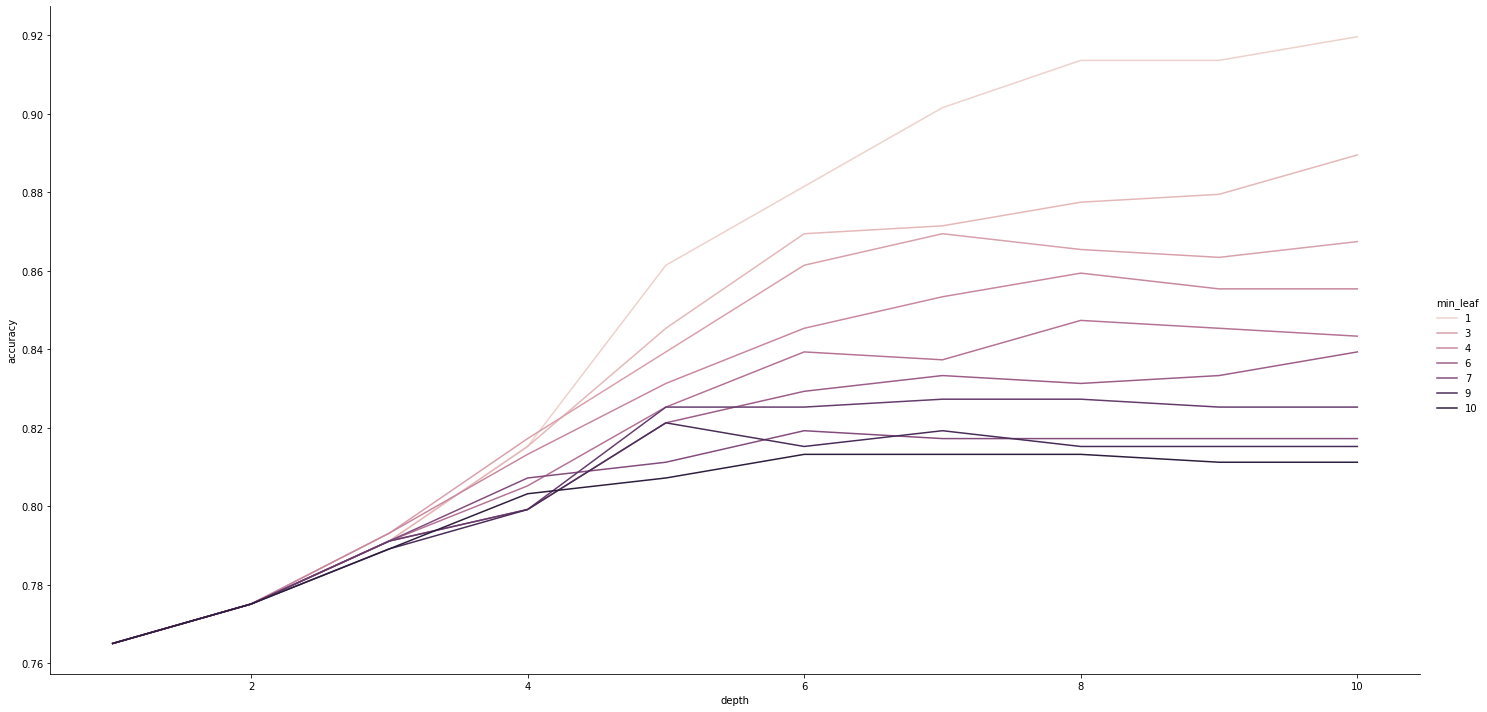

In [65]:
sns.relplot(data=df, x='depth', y='accuracy', hue='min_leaf', aspect=2, height=10, kind='line')

5. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?



After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [67]:
import itertools
depths = range(1,11)
min_leafs = range(1,11)
combos = list(itertools.product(depths, min_leafs))


In [130]:
len(combos)

100

In [ ]:

metrics = []
for depth, min_leaf in combos:
    # Make the model and fit it on train data
    rf = RandomForestClassifier(max_depth= depth,
                                min_samples_leaf = min_leaf,
                                random_state=123)
    rf.fit(x_train, y_train)

    #Predict on train data and score it
    predictions = rf.predict(x_train)
    actual = y_train
    stats = {
        'train_accuracy' : round(rf.score(x_train, y_train), 4),
        'validate_accuracy' : round(rf.score(x_validate, y_validate), 4)
    }
    stats['combo'] = (depth, min_leaf)
    stats['depth'] = depth
    stats['min_leaf'] = min_leaf
    metrics.append(stats)

In [106]:

df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df.head()

,train_accuracy,validate_accuracy,combo,depth,min_leaf,difference
0,0.7651,0.7757,"(1, 1)",1,1,-0.0106
1,0.7651,0.7757,"(1, 2)",1,2,-0.0106
2,0.7651,0.7757,"(1, 3)",1,3,-0.0106
3,0.7651,0.7757,"(1, 4)",1,4,-0.0106
4,0.7651,0.7757,"(1, 5)",1,5,-0.0106


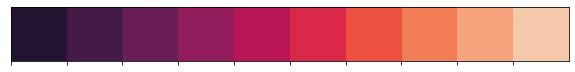

In [108]:
palette = sns.color_palette('rocket', n_colors=10)
palette2 = sns.color_palette('autumn', n_colors=10)
# sns.set_palette(palette)
sns.palplot(palette)


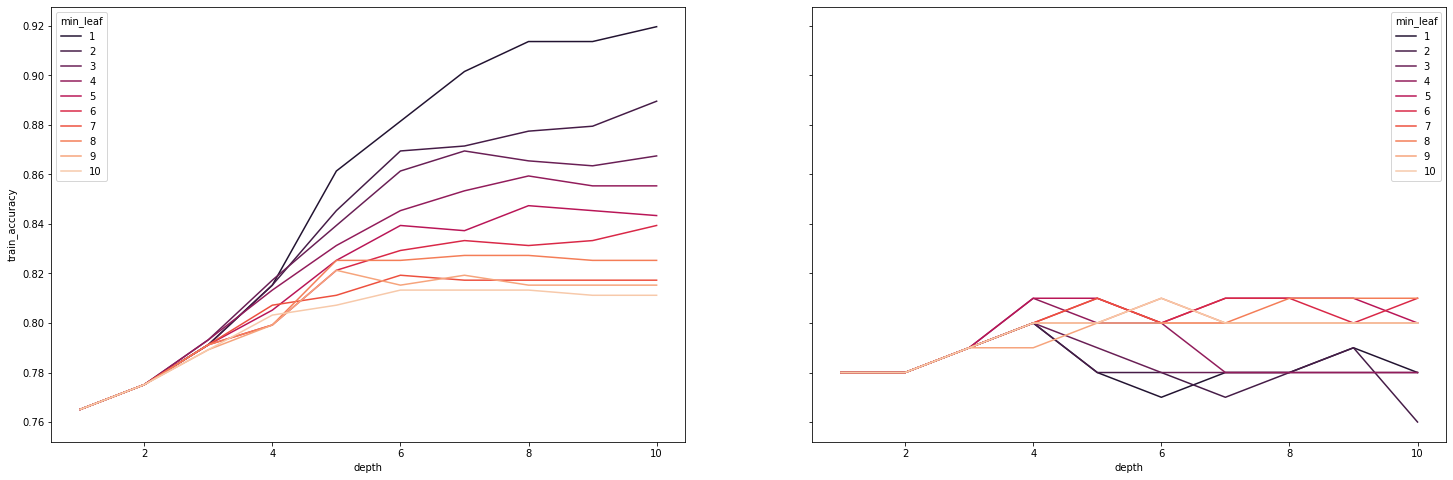

In [133]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,8), sharey=True)
sns.lineplot(x=df.depth, y=df.train_accuracy, hue=df.min_leaf, ax=ax1, palette=palette)
sns.lineplot(x=df.depth, y=df.validate_accuracy, hue=df.min_leaf, ax=ax2, palette=palette)

plt.show()

In [ ]:
pd.options.display.max_rows = 100 #The output will be long
df.validate_accuracy = round(df.validate_accuracy, 2)
df.difference = round(df.difference, 3)


In [126]:
df[abs(df.difference) < .005].sort_values(['validate_accuracy'], ascending=False)

,train_accuracy,validate_accuracy,combo,depth,min_leaf,difference
34,0.8052,0.81,"(4, 5)",4,5,-0.003
46,0.8112,0.81,"(5, 7)",5,7,0.003
35,0.7992,0.80,"(4, 6)",4,6,-0.004
36,0.8072,0.80,"(4, 7)",4,7,0.004
37,0.7992,0.80,"(4, 8)",4,8,0.000
39,0.8032,0.80,"(4, 10)",4,10,-0.000
20,0.7912,0.79,"(3, 1)",3,1,-0.003
21,0.7912,0.79,"(3, 2)",3,2,-0.003
22,0.7932,0.79,"(3, 3)",3,3,-0.001
23,0.7932,0.79,"(3, 4)",3,4,-0.001


> I like (4, 8) the most

In [128]:
rf = RandomForestClassifier(max_depth= 4,
                            min_samples_leaf = 8,
                            random_state=123)
rf.fit(x_train, y_train)
x_test, y_test = split_x_y(test, 'survived', features)
rf.score(x_test, y_test)

0.8268156424581006